Group 00: Luu Thu Trang (2695303) and Raminta Povilaityte (2692655)

# Checklist:
- Prepare your submission using this template;
- The content of the cells that you see below are just an example of the format that you should follow;
- Fill out the group number, member names and student IDs above;
- Adjust assignement number above;
- Type up your answers below using Latex and/or Python as exemplified;
- Don't add the text of the question below, only your answers;
- To create a PDF of your submission go to [File] > [Download as] > [PDF via LaTeX (.pdf)];
- Alternatively, go to [File] > [Download as] > [LaTeX (.tex)], and compile the .tex file;
- *Delete this cell before creating the PDF*.

# Exercise 1

## (a)

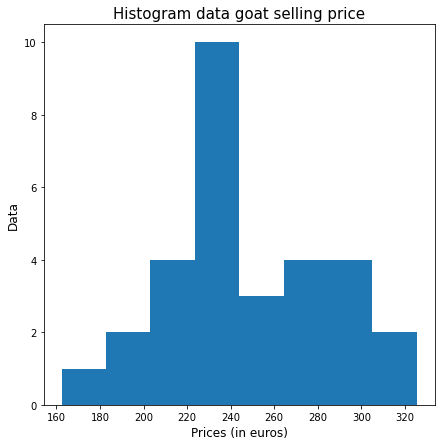

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import math

prices = [301.20, 238.82, 252.79, 212.17, 325.43, 245.92, 200.08, 307.88, 193.33, 232.56,
243.39, 162.40, 226.75, 231.37, 208.21, 226.49, 297.49, 252.77, 289.41, 283.34,
265.80, 280.76, 240.61, 287.22, 216.95, 264.74, 232.78, 204.10, 227.01, 231.31]

plt.figure(figsize=(7,7))

plt.hist(prices, bins = round((max(prices)-min(prices)) / (0.7*len(prices))))

plt.title('Histogram data goat selling price', fontsize='15')
plt.xlabel('Prices (in euros)', fontsize='12')
plt.ylabel('Data', fontsize='12')

plt.show()

The histogram is not symmetric around the mean. And it is not flat around the 2 tails. However we also do not have enough data and information to derive a named distribution for the goat price, so we treat the goat price given as a random sample follows some distribution $F$.

So $X_1,...,X_n$ is iid like $X \sim F$.

## (b)
Explain succinctly how the CLT and LLN can be used to derive an approximate pivot for the
expectation of the price of one goat.

Let $F$ has $EX = \mu$ and $VX = \sigma^2 $

By the LNN we know that
$$\hat{\mu} = \bar{X} \overset{p}{\to} E{X} = \mu$$

By the CLT we have the following:

$$ 
\sqrt{n}\cdot \frac{(\bar{X}-\mu)}{\sigma} \approx N(0,1)
$$

These two properties hold for **any** distribution. Therefore, we can use it to derive an approximate pivot for the expextaion of the price of one goat, even if the distribution $F$ is unknown.

In this case, we don't know $\sigma^2$, so we use an estimate for it. That is the sample variance
$S^2 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}$

Then the pivot is $T = \sqrt{n}\cdot \frac{(\bar{X}-\mu)}{S} \approx t_{n-1}$

## (c)

Derive, step-by-step, the expression for a two-sided, 95% confidence interval for the expectation
of the price of one goat based on the pivot from (b).


$$ 
P(t_{n-1;0,025} \leq T \leq t_{n-1,0.975}) = 0.95
$$
$$
= P(t_{n-1;0,025} \leq \sqrt{n}\cdot \frac{(\bar{X}-\mu)}{S} \leq t_{n-1,0.975}) = 0.95
$$
$$
= P(\bar{X} - \frac{S}{\sqrt{n}}\cdot t_{n-1;0,025} \leq \mu \leq \bar{X} +\frac{S}{\sqrt{n}}\cdot t_{n-1;0,025}) = 0.95
$$

So the 95% confidence interval for the expectation of the price of the goat is 
$$[\bar{X} - \frac{S}{\sqrt{n}}\cdot t_{n-1;0,025},\bar{X} +\frac{S}{\sqrt{n}}\cdot t_{n-1;0,025}]$$

## (d)

Write a Python function that takes the data as input and outputs (the bounds of) the confidence
interval from (c).


In [7]:
def confidenceInterval(data,alpha):
    L = np.mean(data) - np.sqrt(np.var(data,ddof=1))*t.ppf(1-alpha/2,len(data)-1)
    U = np.mean(data) + np.sqrt(np.var(data,ddof=1))*t.ppf(1-alpha/2,len(data)-1)
    return ("CI is [{:.3f},{:.3f}]".format(L,U))

sample_mean = np.mean(prices)
CI = confidenceInterval(prices,0.05)
print (sample_mean)
print (CI)


246.1026666666667
CI is [168.375,323.830]


## (e)

What is the confidence interval that you get for the dataset from above? Is it correct to say that
the expectation of the price of one goat belongs to this interval with probability 0.95? Justify
your answer.

The confidence interval is $$ [168.375,323.830] $$ It is correct to say that
the expectation of the price of one goat belongs to this interval with probability 0.95. Because the interval says that we are 95% confident that the real expected goat price lies betweeen the 2 bounds of the interval no. 

## (f)

Suppose that you have 4000 to spend on goats and the the seller is willing to sell you goats at
the expected price but you don’t know in advance what this price is. Based on the information
that you got from the confidence interval from (d), how many goats can you confidently expect
to be able to purchase? (Please keep in mind that, in polite society, you cannot expect to buy
something like 3.62 goats.)


In [8]:
number_of_goats = math.floor(4000/math.ceil(sample_mean))
print("The number of goats we can buy is", number_of_goats)

## I thought since they ask us to decide based on the information from the confidence interval, what we can confidently purchase
## is the min possible amount of goats at the highest price from CI? just food for thought

U = np.mean(prices) + np.sqrt(np.var(prices,ddof=1))*t.ppf(1-0.05/2,len(prices)-1)
number_of_goats1 = math.floor(4000/U) 
print("**Alternative number of goats we can buy is", number_of_goats1)

The number of goats we can buy is 16
**Alternative number of goats we can buy is 12


# Exercise 2

## (a)

Suppose that you can think of the number of rotten oranges in a given bag as a random sample
of size 12 from some population of oranges where an orange is rotten with some (unknown)
probability p. If Xi represents the number of rotten oranges in the i-th bag, then what is the
distribution of Xi?

The distribution of $X_i$ could be best expressed as: $\quad \quad Hypergeom(N,N*p,12)$<br>
<i>where:</i><br> <b>N</b> - "population" of oranges<br>
    <b>N*p</b> - number of oranges of the "population" that are rotten <br>
      <b>p</b> - probability of finding a rotten orange from its "population"<br>
      <b>12</b> - we sample 12 oranges per bag.</center> <br>
      <br>
However, since the overall orange "population" is assumed to be <b>very large comparing to the sample size of 12</b> oranges and since, from given data we can tell that p is not very close to neither 0 nor 1, then we can approximate that:<br>
           $$Hypergeom(N,N*p,12) \approx  Bin(12, p) $$ Thus we conclude that :  
           $$\quad X_i \sim Bin(12, p) $$ 
       

## (b)

Suppose that you would find it acceptable to get on average 1 rotten orange per bag. How
would you pick p0 in a null hypothesis of the type H0 : p = p0 to reflect this?

Suppose we expect on average 1 rotten orange per bag i : $$E(X_i) = 1$$  <br>
Using Binomial distribution expectation formula: $$E(X_i)= n*p$$ 
We get the following expression : $$E(X_i)= 12*p= 1$$
Solving the later expression for p we get $$p=p_0 = \frac{1}{12}$$
Therefore null hypothesis for this test: $$ H_0 : p=\frac{1}{12}$$

## (c)

Which alternative hypothesis would you pick so that if you reject the null from (b) you can
conclude that (at a certain significance level) there is, on average, more that one rotten orange
per bag of 12?

Since we want to establish whether on average there's more than one rotten orange per bag, we must establish an alternative hypotesis to check whether the probability of finding the rotten fruit is indeed larger than that, which would result with an acceptable average of 1 rotten fruit per bag. Therefore, an appropriate alterative hypothesis for this statistical test is:
$$H_1: p>\frac{1}{12}$$

## (d)

Suppose that you use the following rejection rule; you reject H0 at significance level α if
T =
Xn
i=1
Xi > Cα,
where Cα is some appropriately chosen critical value. (n = 10 here.) What is the distribution
of T under the null hypothesis from (b)?


Given the rejection rule for null hypothesis is:
$$ T = \sum_{i=1}^{n} X_i\ > C_\alpha$$ 
It is known that the sum of independent, identicaly distributed binomial random variables is binomially distributed: 
$$ X_1+X_2+...+X_n \sim Bin(n*12, p)$$
in our case n = 10, therefore we find T distribution to be: 
$$T \sim Bin(10*12, p) = Bin(120,p)$$

## (e)

Write a function in Python that takes in p0, α ∈ (0, 1) and n ∈ N as input, and outputs the
respective critical value Cα. Suppose that you take α = 0.05; what is the respective Cα? What
is the conclusion of the test?

In [9]:
from scipy.stats import binom
from scipy.stats import norm
import numpy as np

def criticalValue (p,alpha,n):
    c = binom.ppf(1-alpha,n*12, p)
    return c

c = criticalValue(1/12, 0.05, 10)
data = [0, 1, 1, 2, 1, 2, 1, 0, 2, 1]

T = sum(data)
print ("The critical value is", np.round(c))
print('Data statistic T=', T)

The critical value is 15.0
Data statistic T= 11


According to the decision rule we reject the null, if the following holds: $$ T = \sum_{i=1}^{n} X_i\ > C_\alpha$$  With $\alpha = 0.05$ and $n=10$ computed parameters: $C_{0.05} = 15 \quad and \quad T = \sum_{i=1}^{10} X_i\ = 11 \quad$ inequality is not true and thus <b>we do not reject the null hypothesis</b> at significance level 0.05.

## (f)

Write a function that takes in p ∈ (0, 1) and n ∈ N as input, and outputs the respective power
of the test. Plot the power of the test as a function of p for n = 10, and for n = 20. Answer the
following: (i) why are both curves below 0.05 at p = p0? and (ii) how do the two power curves
compare to one another and why?

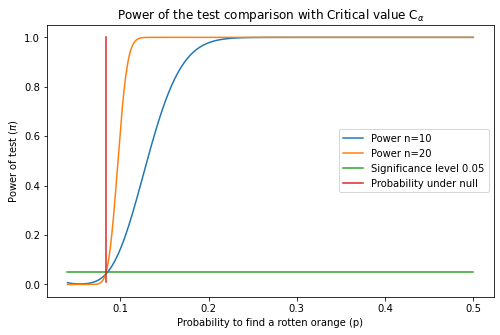

In [10]:
def powerOfTest (n, p):
    critical = np.round(criticalValue(1/12, 0.05, n),0)
    index = 1
    power = 1
    while index <= critical:
        power -= binom.pmf(index, n*12,p)
        index +=1
    return power

x_1 = np.linspace(0.04,0.5,1000)
y_1 = np.linspace(0.01,1,1000)
alpha = np.ones(1000)*0.05
p0 = np.ones(1000)*(1/12)

plt.figure(figsize=(8,5))
plt.plot(x_1,powerOfTest(10,x_1),label='Power n=10')
plt.plot(x_1,powerOfTest(100,x_1),label='Power n=20')
plt.plot(x_1, alpha, label = 'Significance level 0.05')
plt.plot(p0, y_1, label = 'Probability under null')
plt.title(r'Power of the test comparison with Critical value C$_\alpha$')
plt.xlabel('Probability to find a rotten orange (p)')
plt.ylabel('Power of test ($\pi$)')
plt.legend() 
plt.show()

In [11]:
power_10 = powerOfTest(10,1/12)
power_20 = powerOfTest(20,1/12)

print('Power under null of sample size 10 :', np.round(power_10,3))
print('Power under null of sample size 20 :', np.round(power_20,3))

Power under null of sample size 10 : 0.041
Power under null of sample size 20 : 0.045


<i>why are both curves below 0.05 at p = p0?</i> <br><br>
i) 
Under null, expected amount of rotten oranges from sample size of 10 bags would be 10 and our test statistic equates to 11 (very close). Therefore, since the sample size of observed values is very small, critical value was computed to avoid making type I error with the significance level 0.05. We find that our test statistic does not fall in the critical region of the calibrated test, which is why we <b> do not reject the null </b>. As a result to the test statistic not proving the alternative nor it being close to the critical value, the power of the test is below 0.05 for both sample sizes 10 and 20.
<br><br>

<i>how do the two power curves compare to one another and why?</i><br><br>
ii) The power curve of the larger sample size (n=20) has a steeper slope than that of the sample size 10 for p under the alternative ($p>\frac{1}{12}$). Which is intuitively expected, since by increasing the sample size we can make more accurate data-supported decisions and thus can be more certain to reject the null hypothesis <b>correctly. 

# Excercise 3

## (a) 

Make a scatterplot of the (x, y) pairs

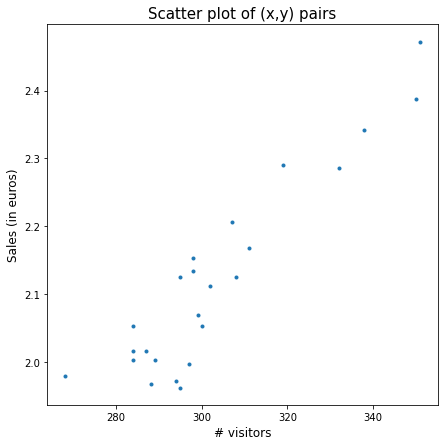

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import probplot

visitors = np.array([288, 351, 332, 268, 289, 319, 300, 298, 295, 287, 284, 297, 302, 294, 284, 299, 298,
350, 308, 284, 295, 307, 338, 311])
sales = np.array([ 1.968, 2.472, 2.286, 1.980, 2.004, 2.290, 2.054, 2.135, 2.125, 2.016, 2.016, 1.998,
2.113, 1.973, 2.004, 2.069, 2.154, 2.388, 2.125, 2.054, 1.963, 2.207, 2.342, 2.168])

plt.figure (figsize = (7,7))
plt.plot (visitors, sales, ".")
plt.title('Scatter plot of (x,y) pairs', fontsize='15')
plt.xlabel('# visitors', fontsize='12')
plt.ylabel('Sales (in euros)', fontsize='12')
plt.show()

## (b)

Write down the modelling equations that you use to regress the sales linearly on the number of
visitors. What do you need to assume on the noise terms in the modelling equations in order
to use the SLR model?

Equation: 

$$ Y_i = \alpha + \beta * X_i +\sigma * \epsilon_i  
\quad for \: i = 1,...,n $$

Where for idependent $\epsilon_1, ..., \epsilon_n$, $ {E}(\epsilon_i) = 0, {V}(\epsilon_i) = 1$

## (c)

Using the expressions that we derived in class, estimate the parameters of the model – i.e., the
intercept α, the slope β, and the variance σ^2 – from the data. Make a plot of the data and the
respective regression line.

mean visitors = 303.25
mean sales = 2.121
β = 0.0063335448289326
α = 0.20035253062618907
σ² = 0.002731428221647441
R^2 = 0.8624254410922618


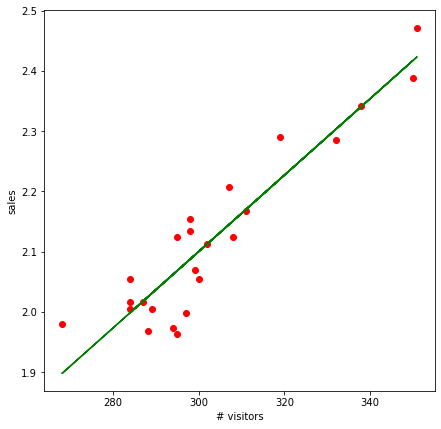

In [13]:
x = visitors
y = sales
n = len(visitors)

sample_mean_x = np.mean(x)
sample_mean_y = np.mean(y)

SSxy = np.sum(x*y)- n*sample_mean_x*sample_mean_y
SSxx = np.sum(x*x)- n*sample_mean_x*sample_mean_x
SSyy = np.sum(y*y)- n*sample_mean_y*sample_mean_y

slope = SSxy/SSxx
intercept = sample_mean_y - slope*sample_mean_x
noise = SSyy/n - (slope**2)*SSxx/n

print ("mean visitors =", sample_mean_x)
print ("mean sales =",sample_mean_y)
print ('\u03B2 =', slope)
print ('\u03B1 =', intercept)
print ('\u03C3\u00b2 =', noise)

y_pred = intercept + slope * x 
residuals = y - y_pred

SSres = np.sum(residuals**2)
  
SSyy = np.sum((y - sample_mean_y)**2)
R2 = 1- (SSres/SSyy)
print('R^2 =', R2)

plt.figure (figsize = (7,7))
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('# visitors')
plt.ylabel('sales')
plt.show()

## (d)

Compute the residuals and use them to perform the diagnostics of the fit. What do you conclude?


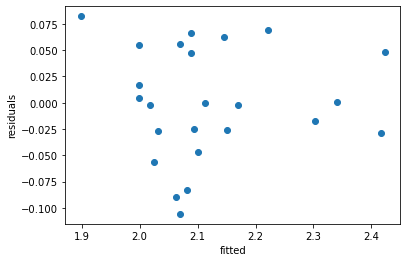

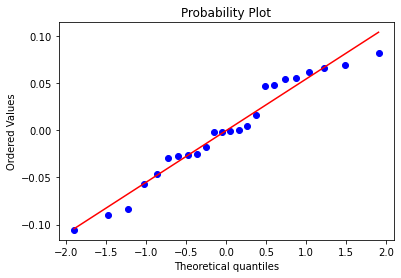

In [14]:
plt.scatter(y_pred, residuals)
plt.xlabel('fitted')
plt.ylabel('residuals')

plt.show()

probplot(residuals, dist="norm", plot=plt)
plt.show()

From the plots of the residuals and $R^2$, we can conclude that the model made a good fit for the data.

## (e)

 Suppose that an advertisement company is asking you for 450¤ to run a campaign that increases
the number of visitors in one day by 20%. Based on your statistical analysis, do you think that
this is worth it? In what sense is it indeed/not worth it?

Given our analysis, we find predicted response $\hat{Y_i}$ as a function of predictor x:<br>
$\hat{Y_i} = \hat{\alpha}-\hat{\beta}*x_i+\hat{\sigma}*\epsilon_i $<br>
therefore, by increasing $x_i$ by 20% we use $x_i = 1.2*x_1$ in the following :<br>
$\hat{Y'_{i}} = \hat{\alpha}-\hat{\beta}*1.2*x_i+\hat{\sigma}*\epsilon_i$ <br>
Then we check for the impact on the sales that increase in traffic would have by comparing the two:
$\hat{Y_i}-\hat{Y'_{i}} = \hat{\alpha}-\hat{\beta}*x_i+\hat{\sigma}*\epsilon_i-(\hat{\alpha}-\hat{\beta}*1.2*x_i+\hat{\sigma}*\epsilon_i) =(0.2*\hat{\beta})*x_i$ <br>
To evaluate the price increase in euros we use the expected sales value $\bar{x} = 2.121$ in k€ :<br>
$\delta\hat{Y_i} = 0.2*\hat{\beta}*\bar{x}*1000 = 2.69€ < 450€ $ <br> 
In regards to estimated sales increase, the advertisement campaign is not worth it.

In [18]:
delta_slope_coefficient = slope*0.2
delta_sales = delta_slope_coefficient*2.121*1000
print(np.round(delta_sales,2))

2.69
